In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [139]:
dims = [96,112]
error221 = np.fromfile("error_local_221_96x112.f32", dtype=np.float32).reshape(dims)
error219 = np.fromfile("error_local_219_96x112.f32", dtype=np.float32).reshape(dims)


errors =[error219,error221 ]
mapdata219 = np.fromfile("segmentation_map_219.dat", dtype=np.int32).reshape(dims)
mapdata221 = np.fromfile("segmentation_map_221.dat", dtype=np.int32).reshape(dims)


## filter background 
background1 = np.max(np.abs(error221))*0.1
background2 = np.max(np.abs(error219))*0.1
background = max(background1,background2)*0.1

mapdata219[np.abs(error219) < background] = -1
mapdata221[np.abs(error221) < background] = -1



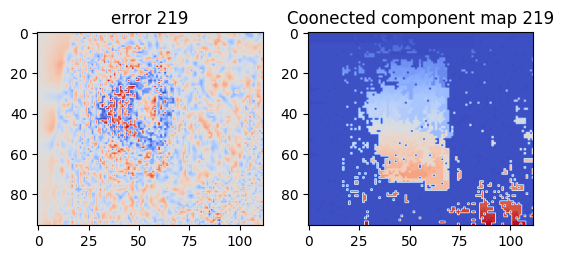

In [140]:
figs, axs = plt.subplots(1,2)
axs[0].imshow(error219,cmap='coolwarm')
axs[0].title.set_text('error 219')
axs[1].imshow(mapdata219,cmap='coolwarm')
axs[1].title.set_text('Coonected component map 219')
plt.show()

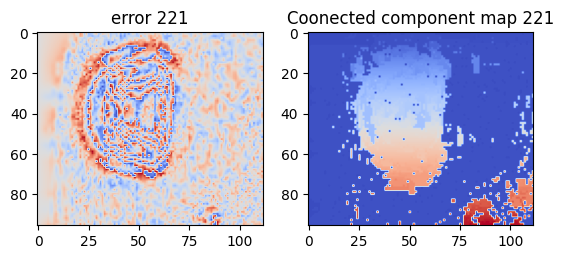

In [141]:
figs, axs = plt.subplots(1,2)
axs[0].imshow(error221,cmap='coolwarm')
axs[0].title.set_text('error 221')
axs[1].imshow(mapdata221,cmap='coolwarm')
axs[1].title.set_text('Coonected component map 221')
plt.show()

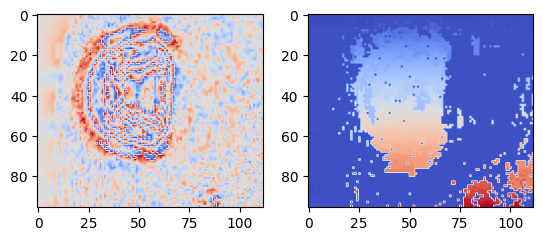

In [136]:
figs, axs = plt.subplots(1,2)
axs[0].imshow(error221,cmap='coolwarm')
axs[1].imshow(mapdata221,cmap='coolwarm')
plt.show()

In [124]:
def plot_seg(mapdata, tag):
    tags, counts = np.unique(mapdata, return_counts=True)
    sorted_area = np.sort(counts)
    plt.plot(sorted_area[1:])
    plt.xlabel("segmentations index")
    plt.ylabel("area")
    plt.title(f"Area of each segment case{tag}")
    plt.show()
    
def plot_accumulated(mapdata, tag):
    tags, counts = np.unique(mapdata, return_counts=True)
    sorted_area = np.sort(counts)
    accumulation = np.zeros_like(sorted_area)
    for i in range(1,len(sorted_area)):
         accumulation[i] = accumulation[i-1] + sorted_area[i]

    plt.plot((accumulation/mapdata.size)[::-1])
    plt.xlabel("segmentations index")
    plt.ylabel("accumulated area")
    plt.title(f"Accumulated area of each segment case{tag}")
    plt.show()
    return (accumulation/mapdata.size)[::-1]

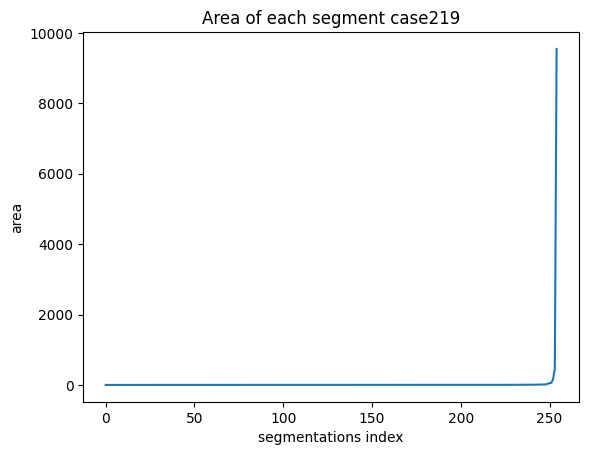

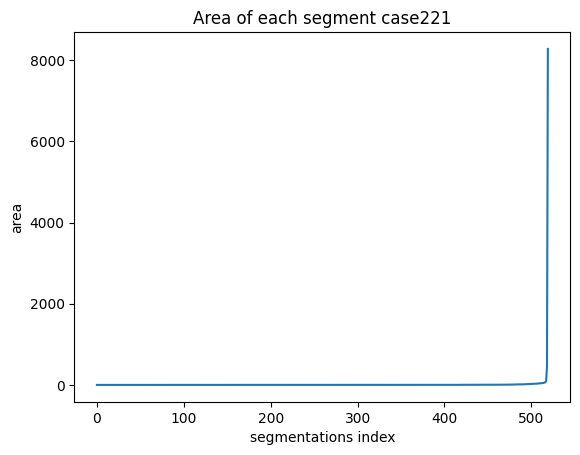

In [121]:
plot_seg(mapdata219, 219)
plot_seg(mapdata221, 221)

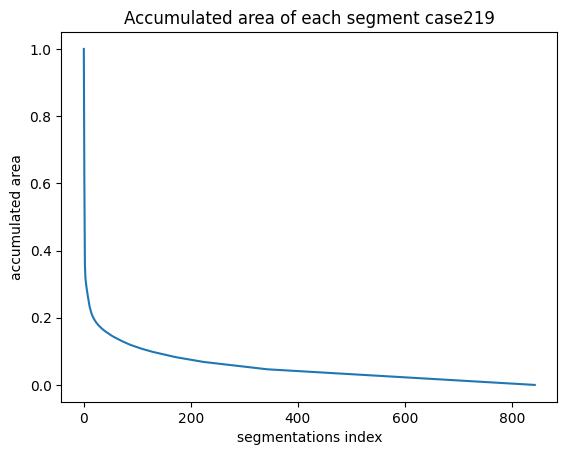

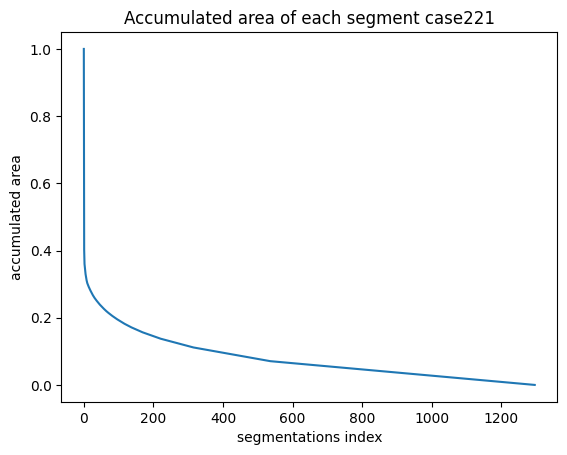

In [142]:
accu219 = plot_accumulated(mapdata219, 219)
accu221 = plot_accumulated(mapdata221, 221)

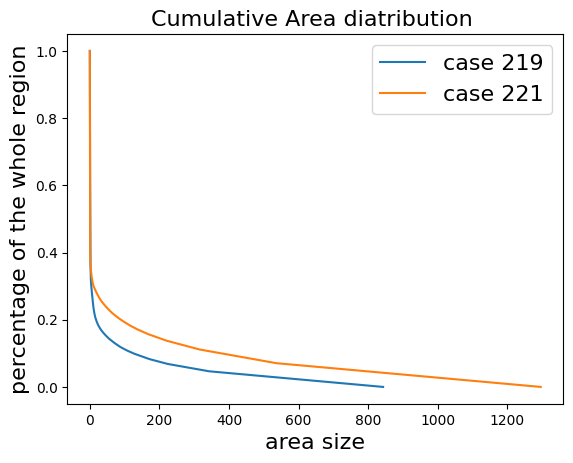

In [143]:
plt.plot(accu219, label="case 219")
plt.plot(accu221, label="case 221")
plt.xlabel("area size",fontsize=16)
plt.ylabel("percentage of the whole region",fontsize=16)
plt.title(f"Cumulative Area diatribution ",fontsize=16)
plt.legend(fontsize=16)


Text(0.5, 1.0, 'Area of each segment case 219')

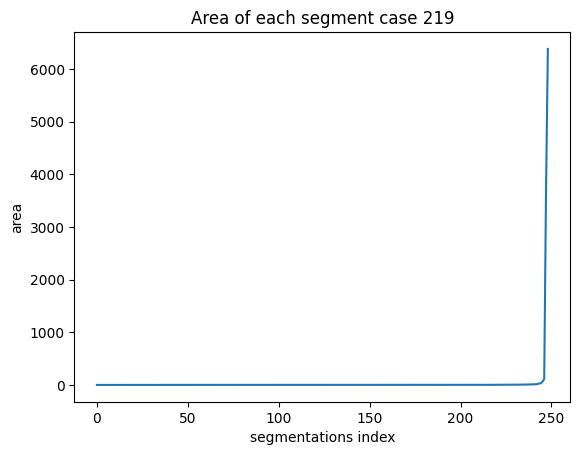

In [112]:
## now remove backgound to count the number of segments
tags, areas = np.unique(mapdata, return_counts=True)

sorted_area = np.sort(areas)
plt.plot(sorted_area[1:])
plt.xlabel("segmentations index")
plt.ylabel("area")
plt.title("Area of each segment case 219")

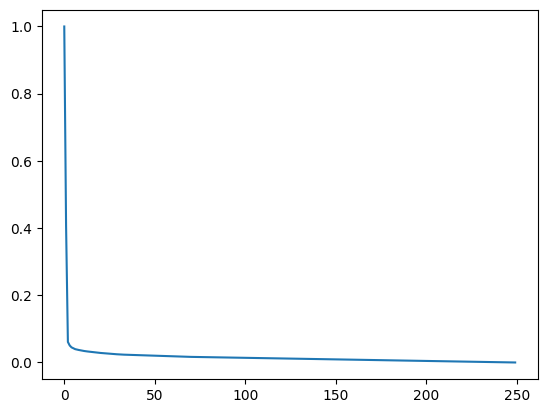

In [113]:
## make an accumulation 
accumulation = np.zeros_like(sorted_area)
for i in range(1,len(sorted_area)):
    accumulation[i] = accumulation[i-1] + sorted_area[i]

plt.plot((accumulation/mapdata.size)[::-1])
# plt.plot((accumulation/mapdata.size)[::-1])